<a href="https://colab.research.google.com/github/AndrewDavidRatnam/HandsonWorkingML/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## .
We Load the MNIST and then run sgd, random forest on the whole dataset and also the PCA reduced dataset and see the comparions

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

In [2]:
X_train = mnist.data[:60_000]
y_train = mnist.target[:60_000]

X_test = mnist.data[60_000:]
y_test = mnist.target[60_000:]

In [ ]:
#Training a random classifer on the whole dataset
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
%time rnd_clf.fit(X_train, y_train)

CPU times: user 59.5 s, sys: 165 ms, total: 59.7 s
Wall time: 1min 11s


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [11]:
#Using PCA reduced dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

In [13]:
%time X_train_reduced = pca.fit_transform(X_train)

CPU times: user 22.4 s, sys: 2.44 s, total: 24.8 s
Wall time: 15.2 s


In [ ]:
rnd_clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
%time rnd_clf_pca.fit(X_train_reduced, y_train)

CPU times: user 2min 41s, sys: 321 ms, total: 2min 41s
Wall time: 3min 3s


RandomForestClassifier(random_state=42)

In [12]:
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

1 min 11 secs for random forest without PCA with 0.9705 accuracy
<br>
22 secs + 3min 3 secs for random forest with PCA with 0.9481 accuracy

In [ ]:
#NOW with SGD classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

CPU times: user 3min 41s, sys: 533 ms, total: 3min 42s
Wall time: 3min 52s


SGDClassifier(random_state=42)

In [ ]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.874

In [ ]:
sgd_clf_pca = SGDClassifier(random_state=42)
%time sgd_clf_pca.fit(X_train_reduced, y_train)

CPU times: user 1min 5s, sys: 205 ms, total: 1min 5s
Wall time: 1min 17s


SGDClassifier(random_state=42)

In [ ]:
y_pred = sgd_clf_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8959

## t-SNE
on MNIST

In [14]:
X_sample, y_sample = X_train[:5000], y_train[:5000]


In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, init="random", learning_rate="auto")
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: user 1min 37s, sys: 175 ms, total: 1min 37s
Wall time: 1min 3s


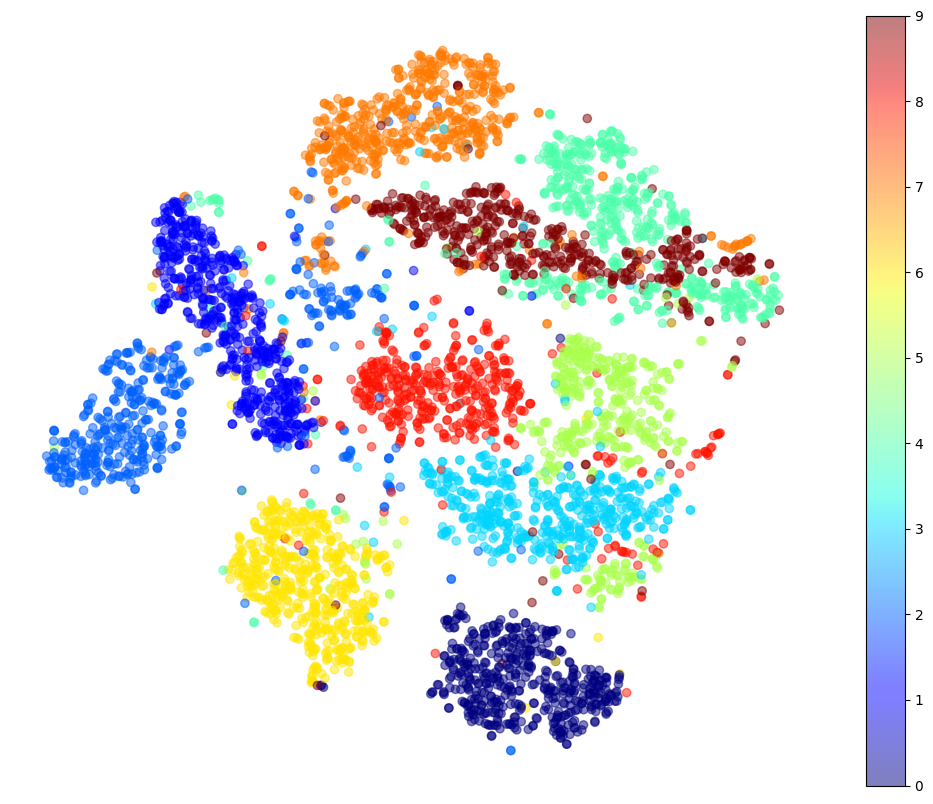

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis("off")
plt.colorbar()
plt.show()

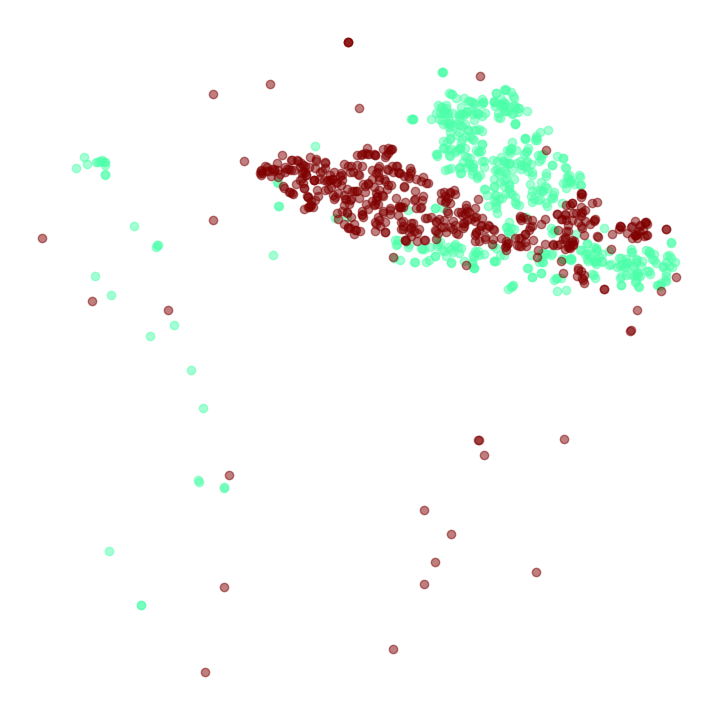

In [22]:
#honing in on the 4s and the 9s
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ("4", "9"):
  plt.scatter(X_reduced[y_sample == digit, 0], X_reduced[y_sample == digit, 1],
              c=[cmap(float(digit)/9)], alpha=0.5)
plt.axis("off")
plt.show()

In [23]:
from sklearn.manifold import TSNE

#running t - distributed Stochastic Neighbour embedding on just the 4s and 9s
idx = (y_sample == "4") | (y_sample == "9")
X_subset = X_sample[idx]
y_subset = y_sample[idx]

tsne = TSNE(n_components=2, random_state=42, init="random", learning_rate="auto")
X_subset_reduced = tsne.fit_transform(X_subset)


In [24]:
X_subset_reduced.shape #(x,y) lol

(1030, 2)

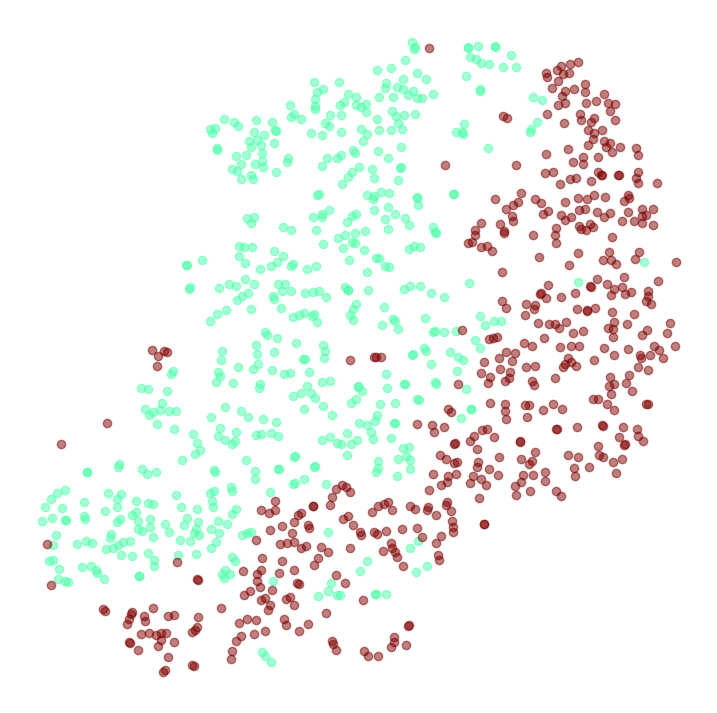

In [25]:
import matplotlib.pyplot as plt
import numpy as np
cmap = plt.cm.jet

plt.figure(figsize=(9, 9))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

`plot_digits()` is a function that will draw a scatter plot with colored digits with some minimum distance guaranteed between these digits

In [31]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

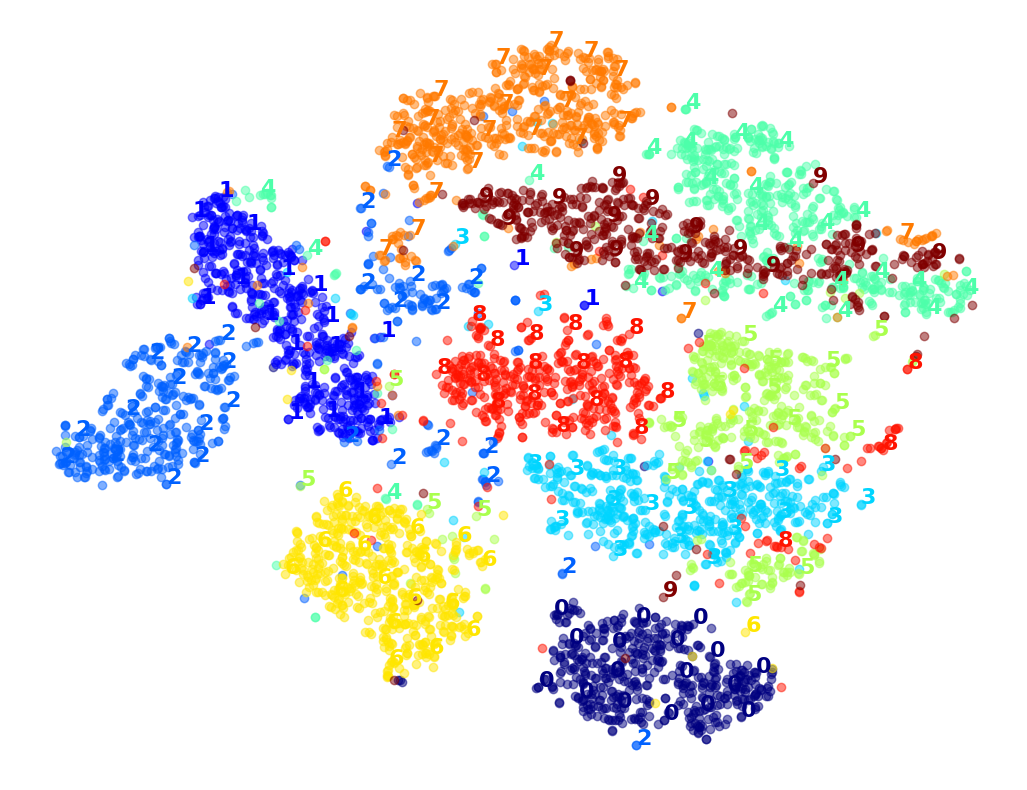

In [32]:
plot_digits(X_reduced, y_sample)

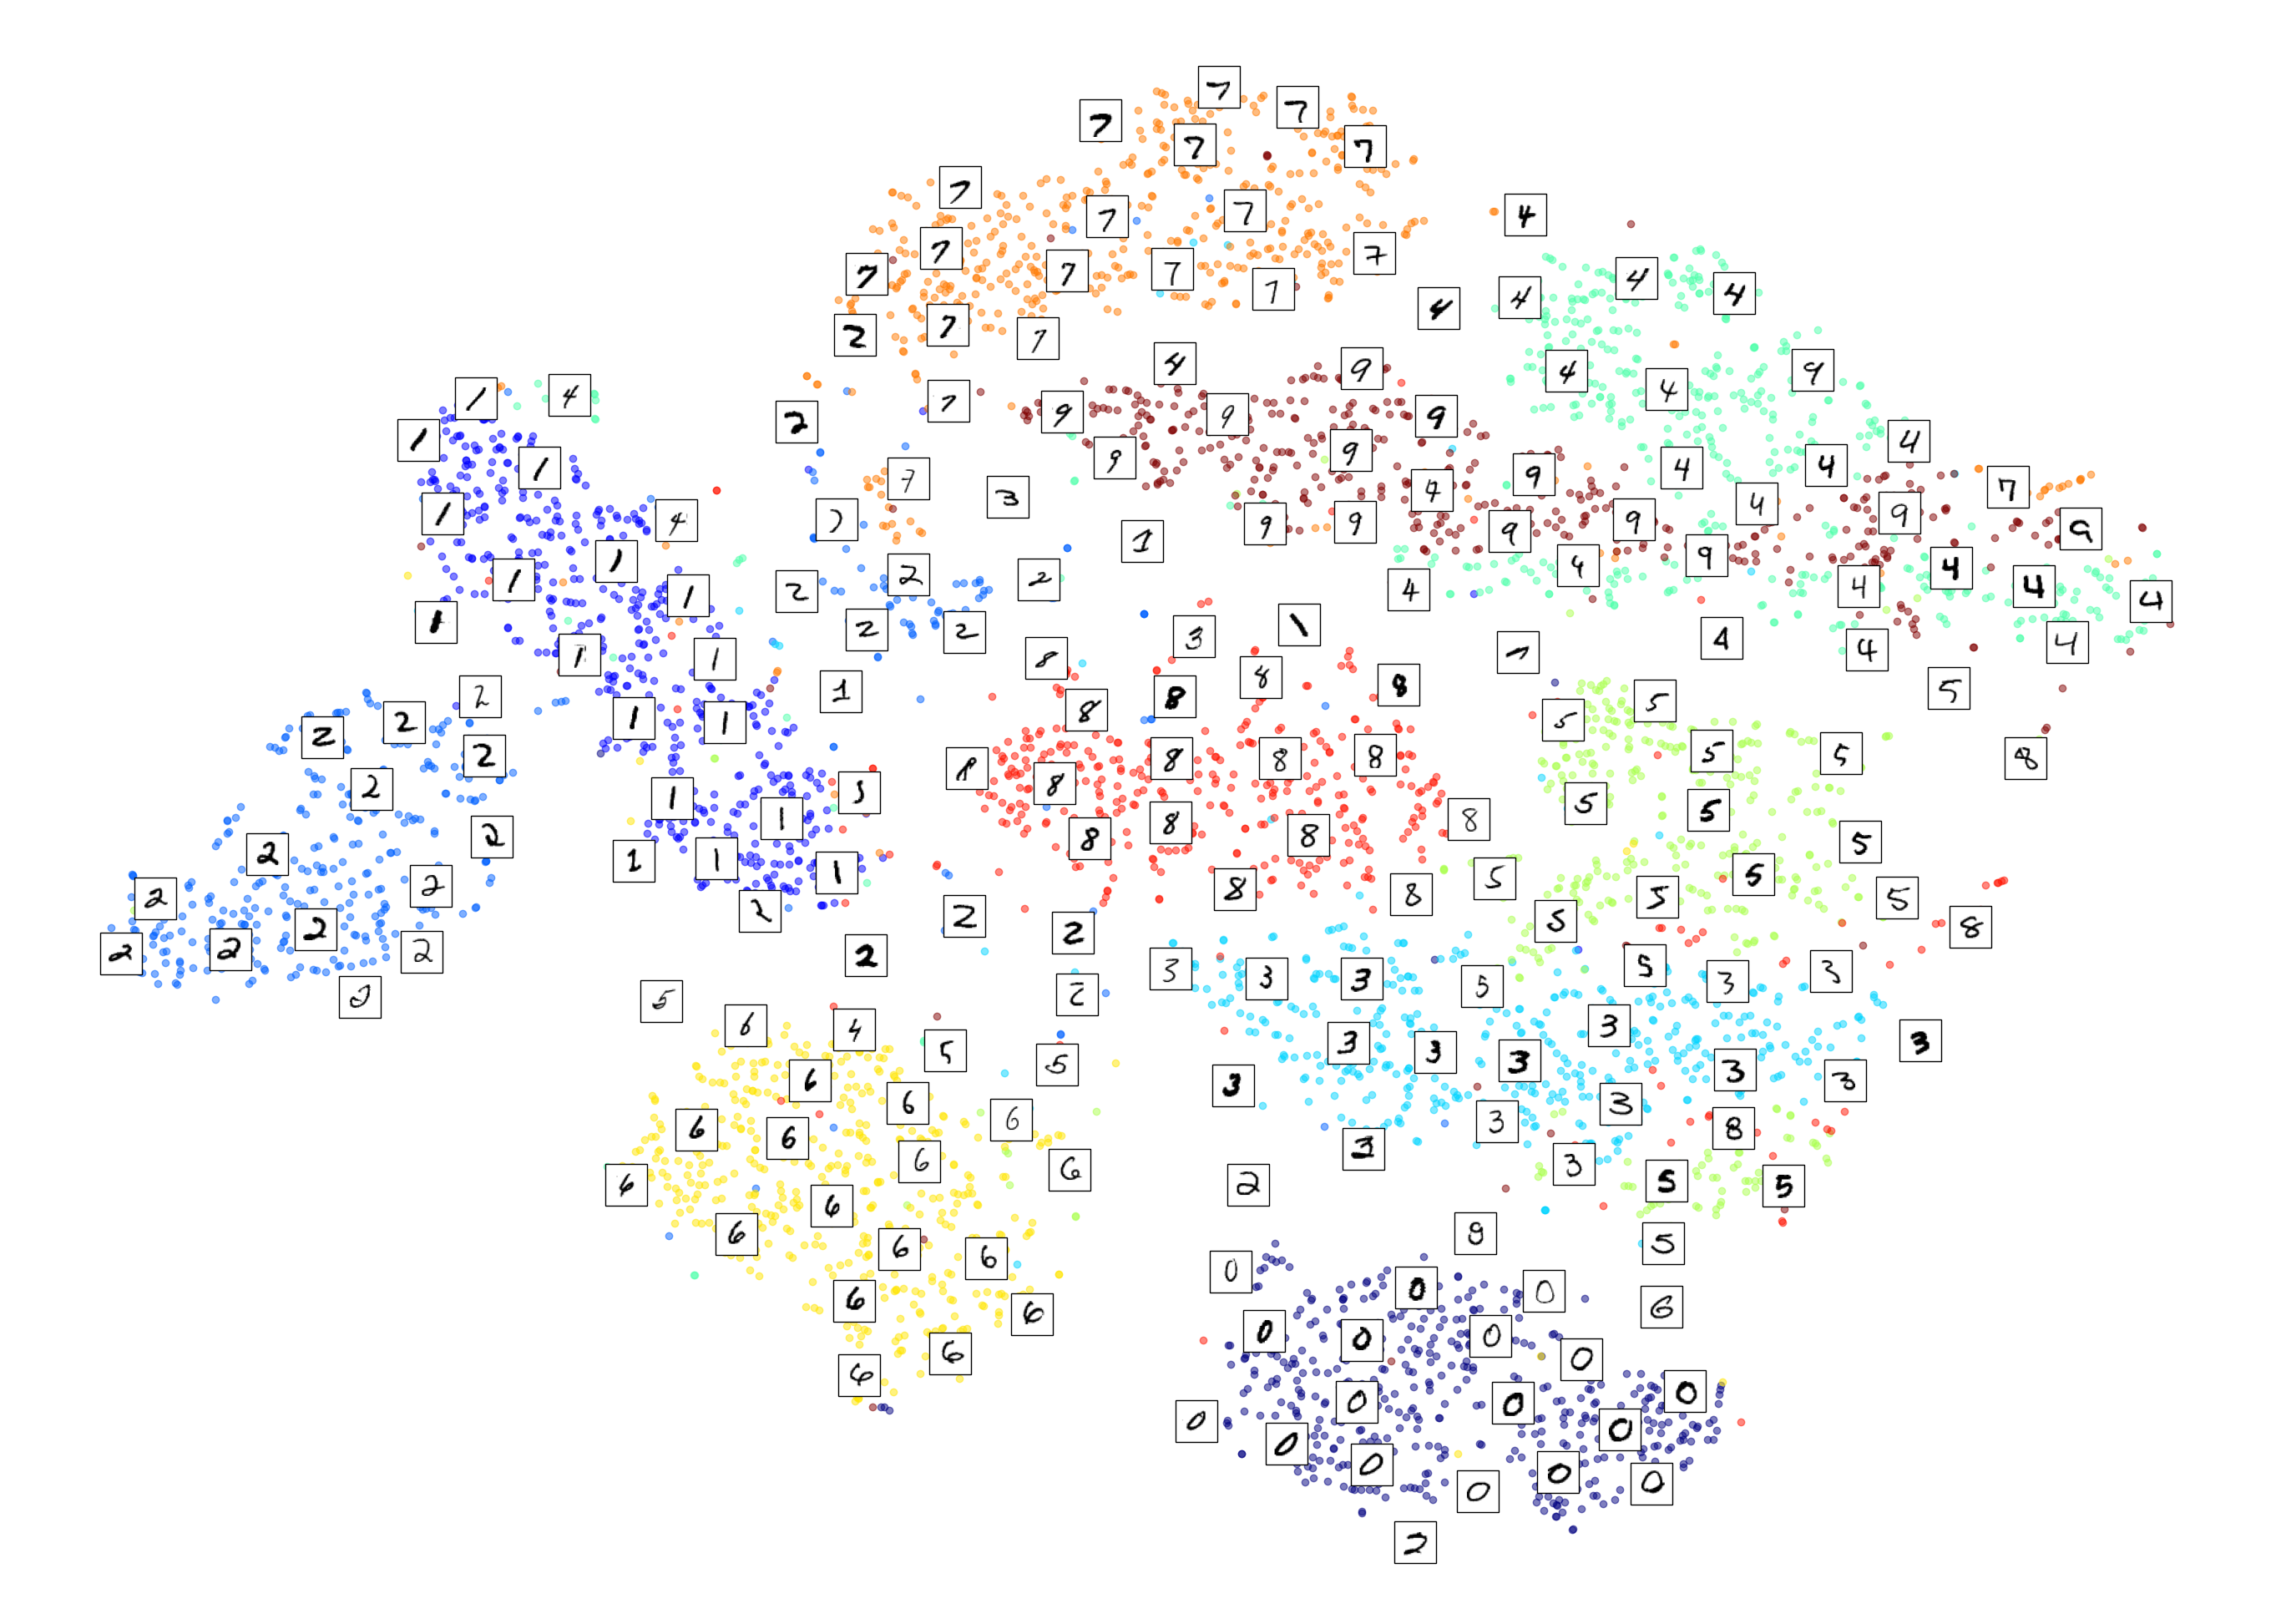

In [34]:
plot_digits(X_reduced, y_sample, images=X_sample, figsize=(35, 25) )

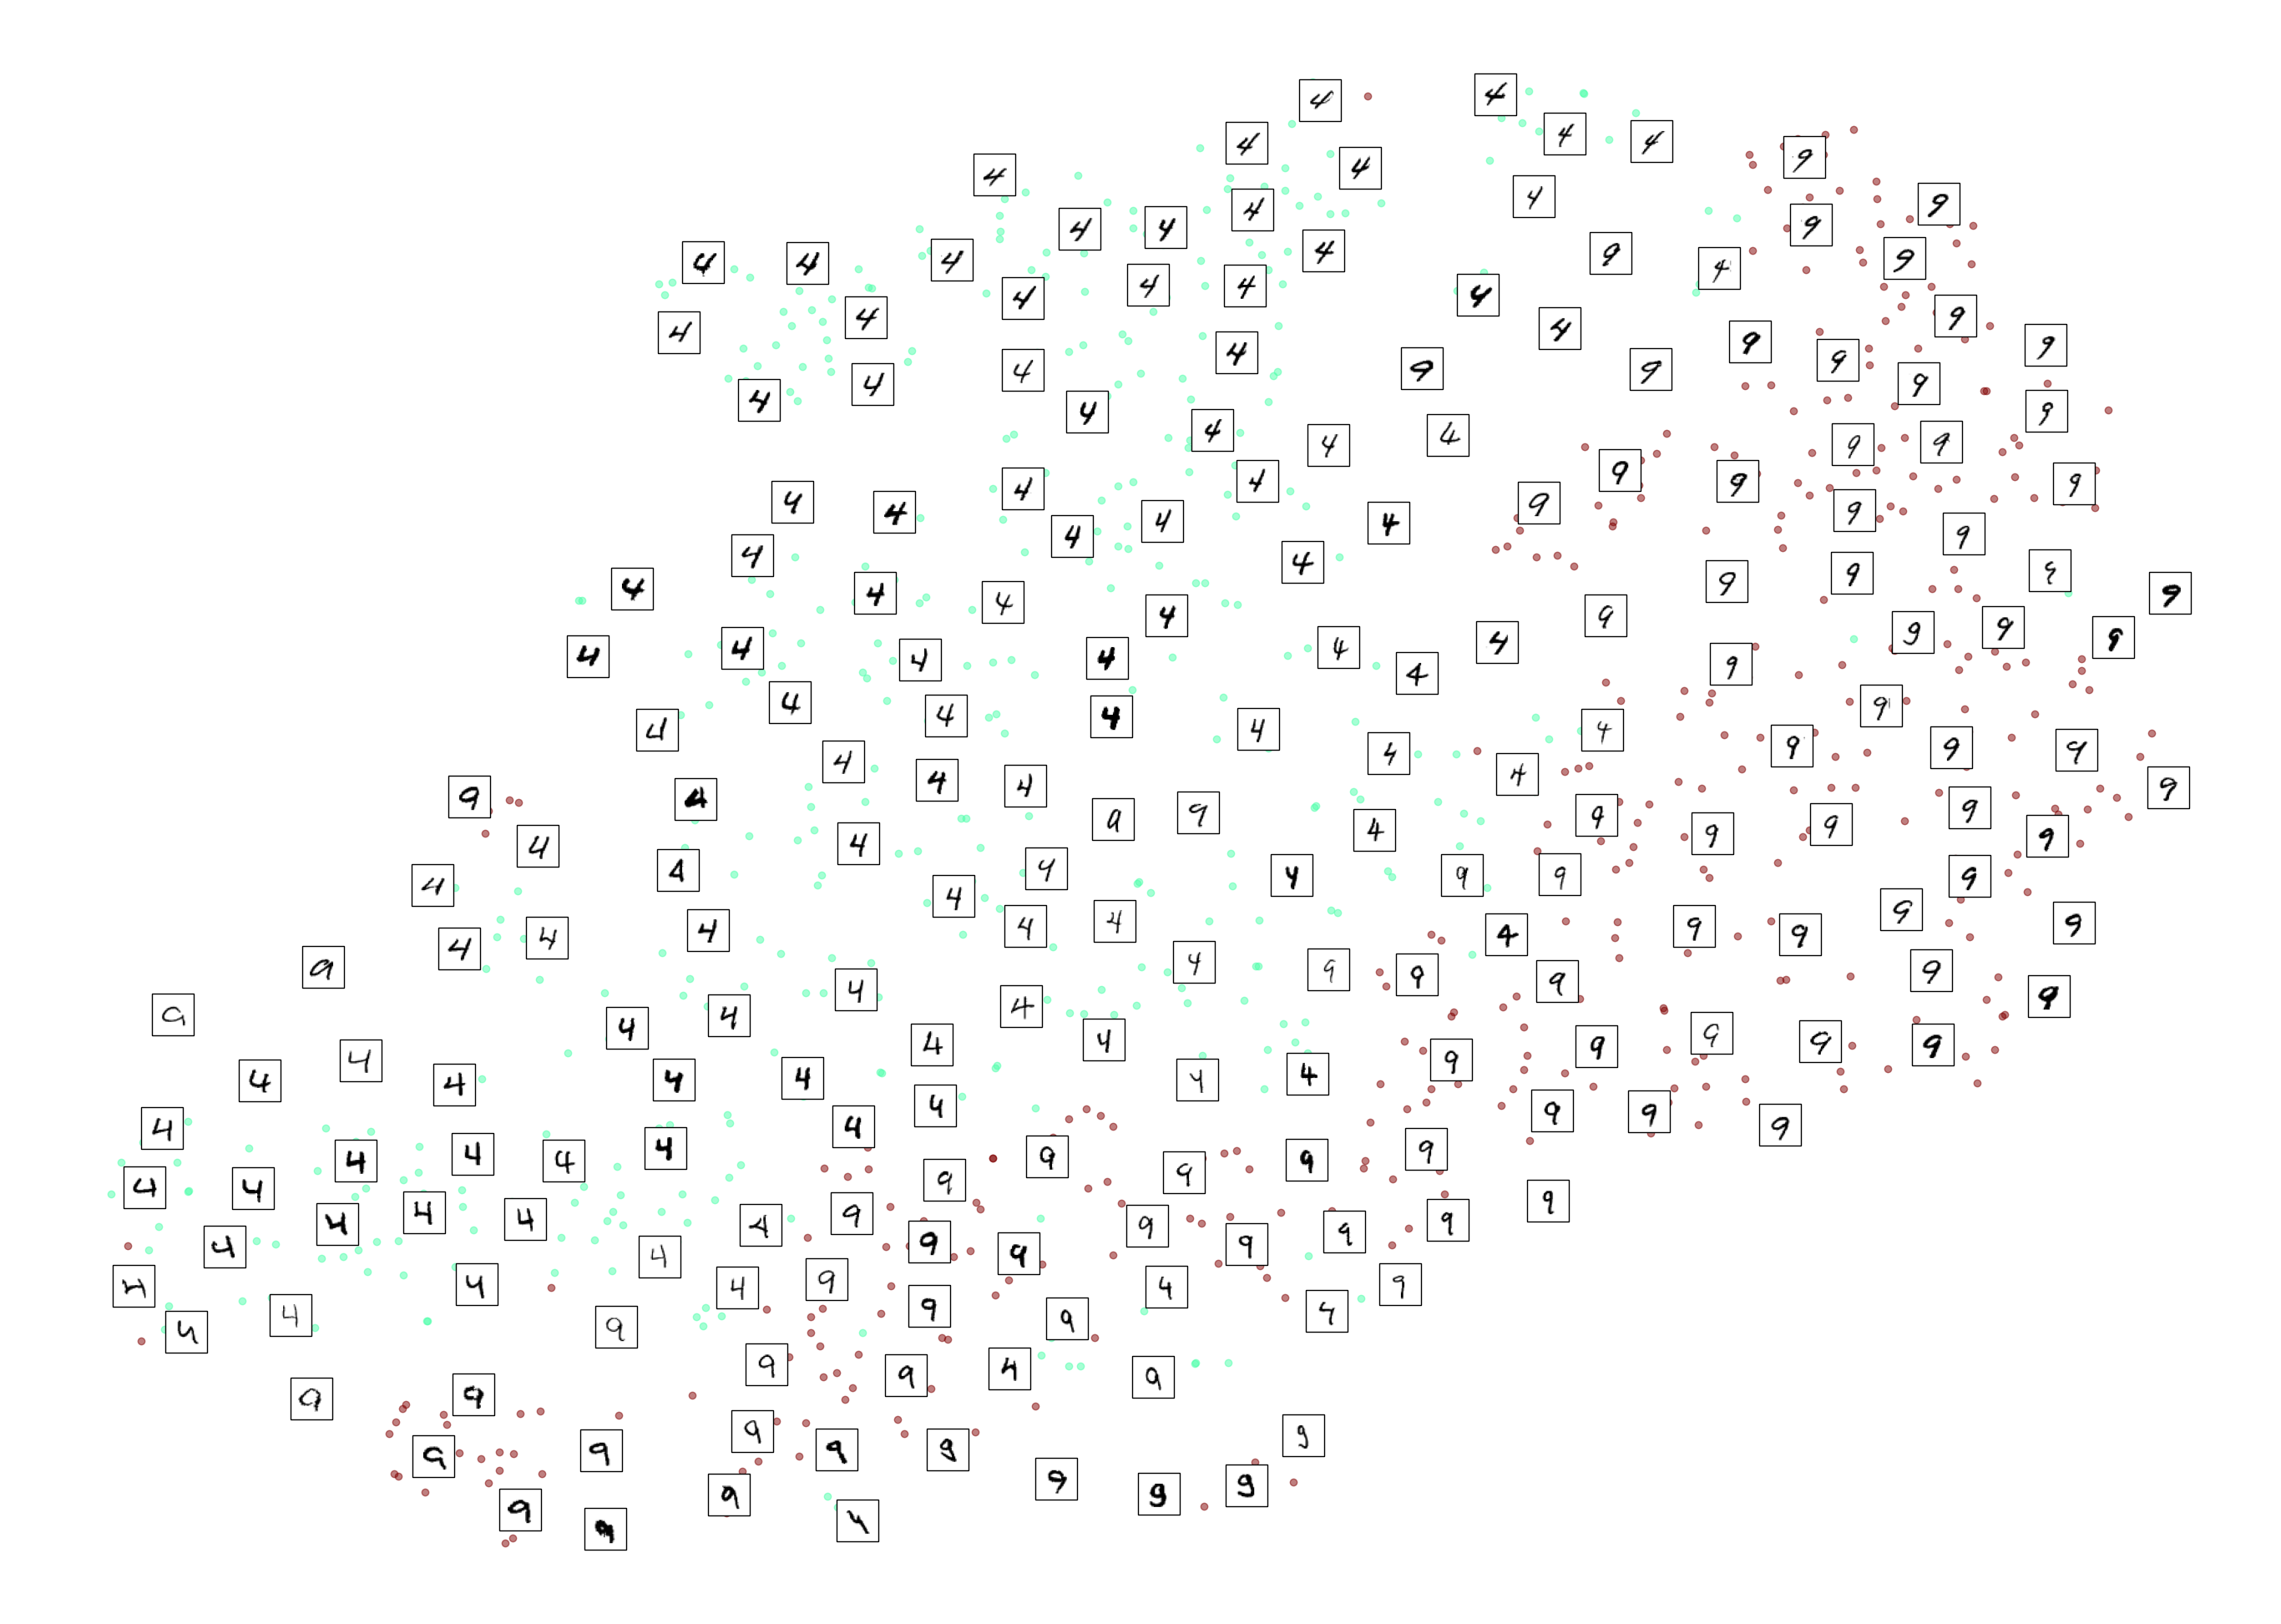

In [37]:
#only 4s and 9s
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(35, 25) )

## Other Dimensionality Reduction Algorithms

### PCA

CPU times: user 410 ms, sys: 69 ms, total: 479 ms
Wall time: 261 ms


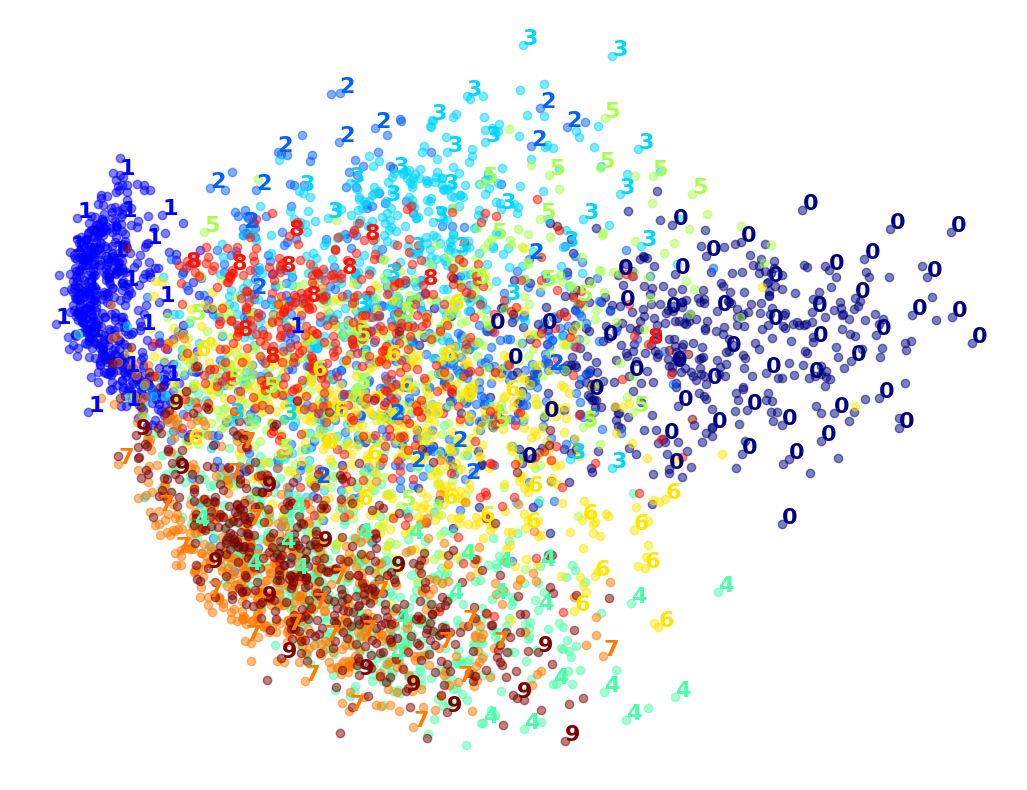

In [38]:
pca = PCA(n_components=2, random_state=42)
%time X_pca_reduced = pca.fit_transform(X_sample)
plot_digits(X_pca_reduced, y_sample)
plt.show()

### Locally Linear Embedding

CPU times: user 6.14 s, sys: 1.84 s, total: 7.98 s
Wall time: 5.77 s


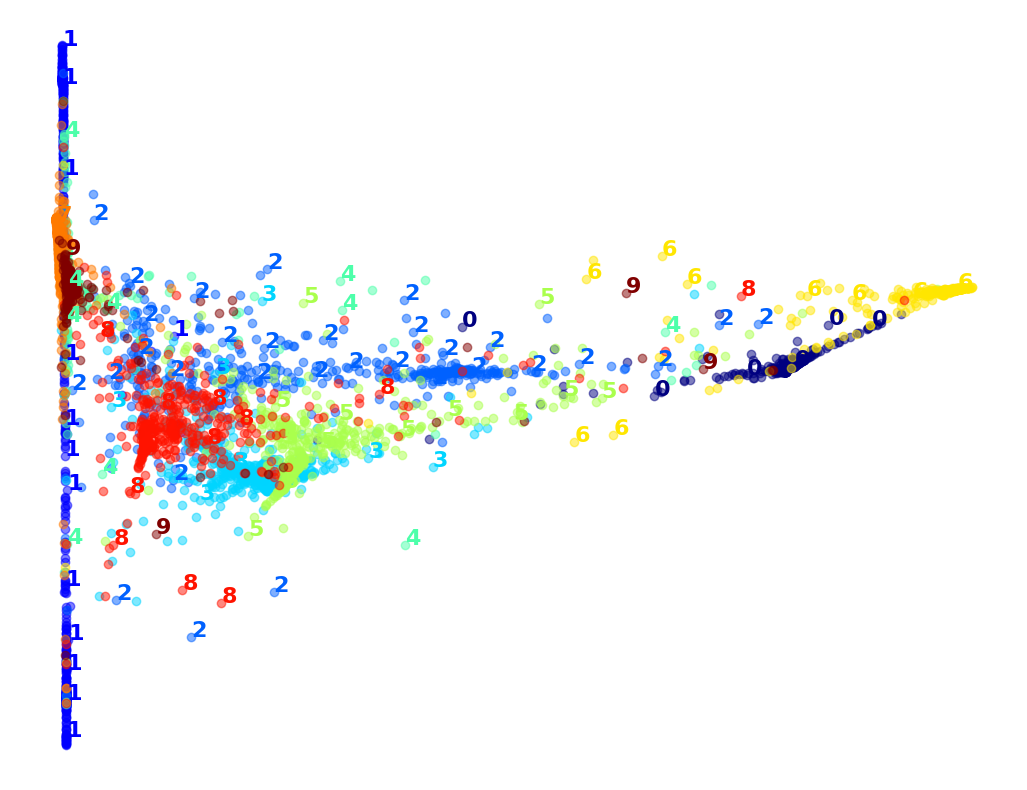

In [39]:
#Locally linear embedding from sklearn
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced = lle.fit_transform(X_sample)
plot_digits(X_lle_reduced, y_sample)
plt.show()

CPU times: user 5.91 s, sys: 2.11 s, total: 8.02 s
Wall time: 7.29 s


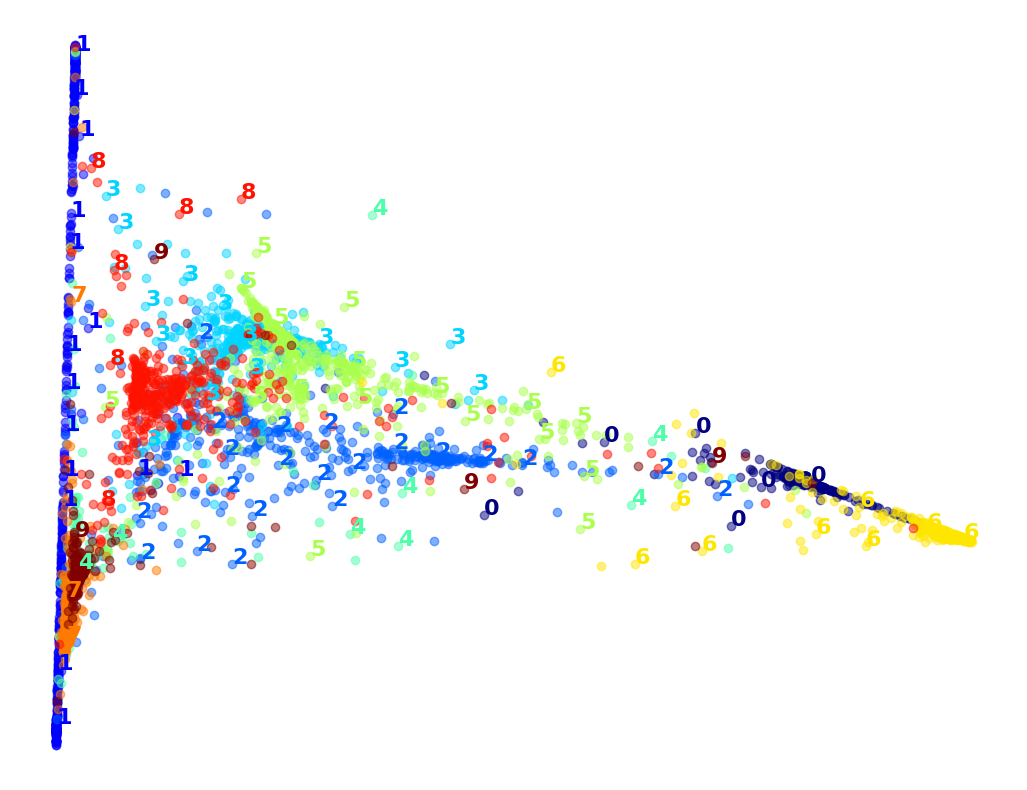

In [43]:
#Applying PCA abd LLE using pipe line
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
%time X_pca_lle_reduced = pipe.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced, y_sample)
plt.show()

CPU times: user 5.81 s, sys: 2.46 s, total: 8.27 s
Wall time: 6.12 s


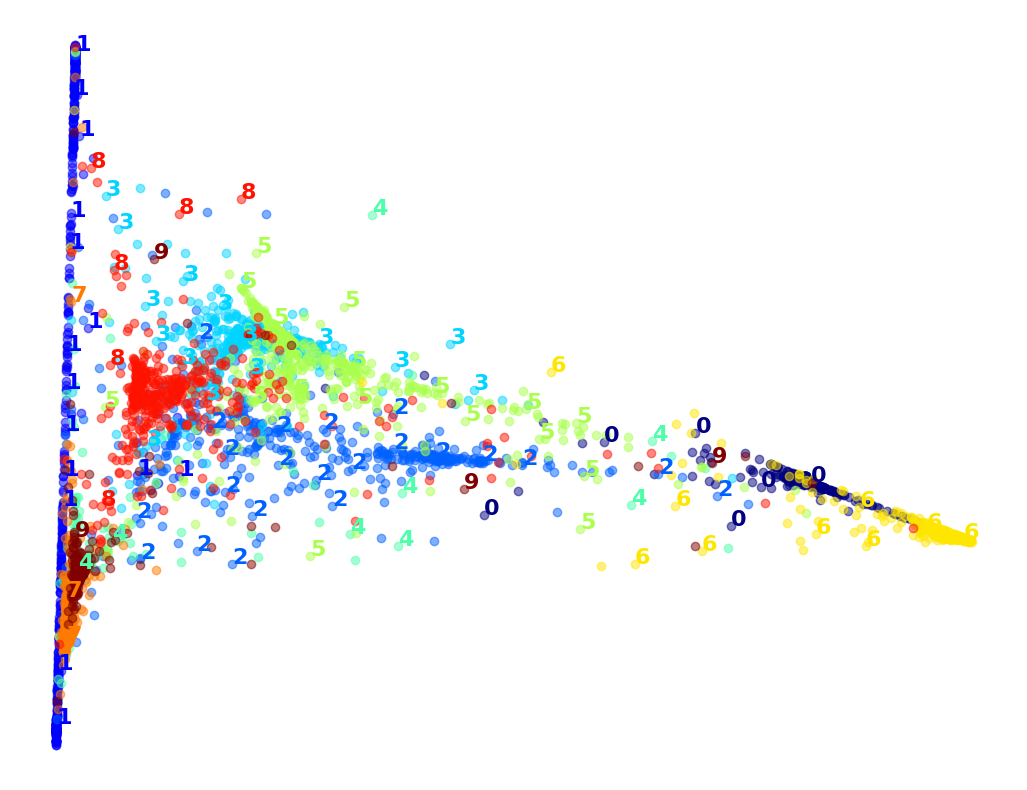

In [44]:
from sklearn.pipeline import make_pipeline
pca_lle = make_pipeline(PCA(n_components=0.95),
                        LocallyLinearEmbedding(n_components=2, random_state=42))

%time X_pca_lle_reduced = pca_lle.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced, y_sample)
plt.show()

### MDS and PCA_MDS
These methods take around 10-30 mins to run

In [49]:
# from sklearn.manifold import MDS
# mds = MDS(n_components=2, random_state=42)
# X_mds_reduced = mds.fit_transform(X_sample)
# plot_digits(X_mds_reduced, y_sample)
# plt.show()

In [50]:
# #pca_mds
# pca_mds = make_pipeline(PCA(n_components=0.95, random_state=42),
#                         MDS(n_components=2, random_state=42))
# %time X_pca_mds_reduced = pca_mds.fit_transform(X_sample)
# plot_digits(X_pca_mds_reduced, y_sample)
# plt.show()

### Linear Discriminant Analysis


CPU times: user 2.47 s, sys: 362 ms, total: 2.83 s
Wall time: 1.96 s


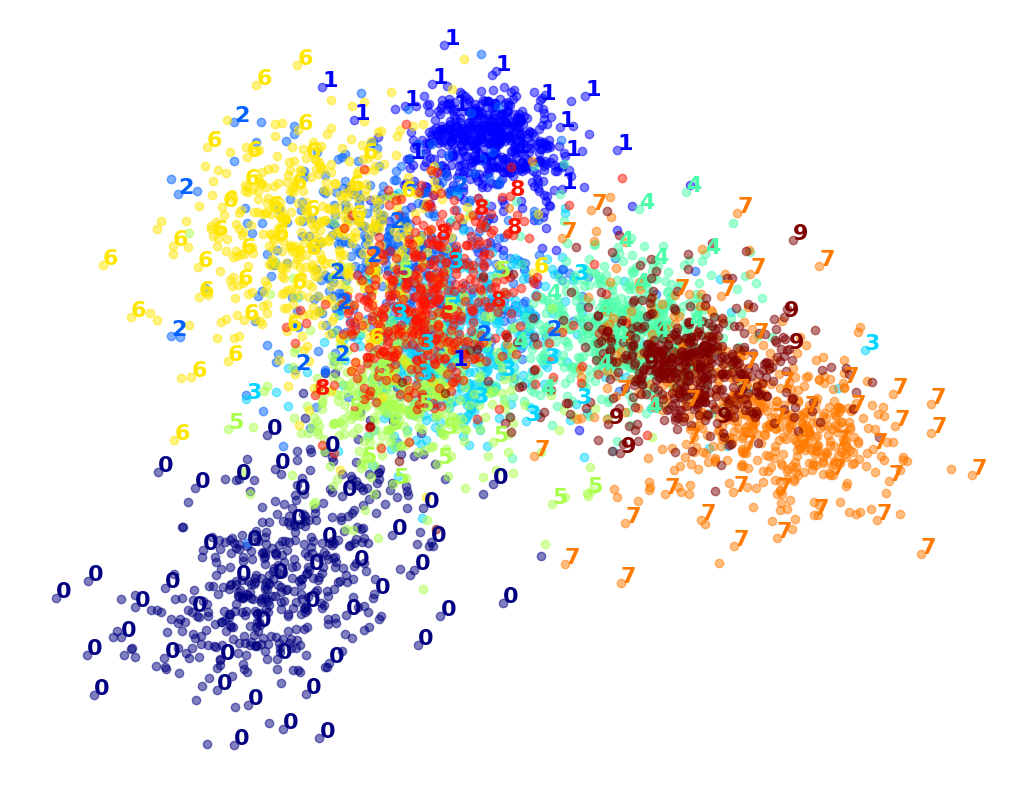

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced = lda.fit_transform(X_sample, y_sample)
plot_digits(X_lda_reduced, y_sample)
plt.show()